CAR ANALYSIS 
----------------

# project title : Exploring Trends in Used Car Sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UNDERSTANDING THE DATASET
---------------------------------

In [3]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Column description
---------------------
'name'---name of the car model

'year'---year of manufacturing, gives the lifespan or age of car
 
'selling_price'---selling price of car in rupees

'km_driven'----number of kilometres a car run

'fuel'---types of fuel ussed(petrol, Diseal)

'seller_type'---types of seller either individual, dealer, or trustmark dealer.

'transmission'---type of gear

'owner'---ownership status like first owner ,etc,..

# CLEANING DATASET

In [5]:
# removing duplicates
df[df.duplicated()]
df=df.drop_duplicates()

In [6]:
df=df.reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3583 non-null   object 
 1   year           3578 non-null   float64
 2   selling_price  3583 non-null   int64  
 3   km_driven      3575 non-null   float64
 4   fuel           3583 non-null   object 
 5   seller_type    3583 non-null   object 
 6   transmission   3583 non-null   object 
 7   owner          3579 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 224.1+ KB


missing data
----------------
1. Year (float type)
2. km_driven  (float type)
3. owner (object)

In [8]:
# median of year
median_year=df['year'].median()
median_year

df['year']=df['year'].fillna(median_year)
# mean of km_driven
mean_kvdriven=round(df['km_driven'].mean())
mean_kvdriven
df['km_driven']=df['km_driven'].fillna(mean_kvdriven)
# mode of owner
mode_owner=df['owner'].mode()[0]
df['owner']=df['owner'].fillna(mode_owner)

In [9]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000.0,Petrol,Individual,Manual,First Owner


DATA TRANSFORMATION

In [10]:
#  changing dataype of year and km_driven
df=df.astype({'year':int,'km_driven':int})

In [11]:
# to get age or life span of car
df['age'] = 2025 - df['year']

In [12]:
# split car name to get specific brand column separately
car_brand = df['name'].str.split(' ', expand=True)
df['brand'] = car_brand[0]

In [13]:
df['age_analysis']=pd.cut(df['age'],bins=[0,7,14,21,28,35],labels=['less used','normal used','moderate used','more used','extremely used'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           3583 non-null   object  
 1   year           3583 non-null   int32   
 2   selling_price  3583 non-null   int64   
 3   km_driven      3583 non-null   int32   
 4   fuel           3583 non-null   object  
 5   seller_type    3583 non-null   object  
 6   transmission   3583 non-null   object  
 7   owner          3583 non-null   object  
 8   age            3583 non-null   int32   
 9   brand          3583 non-null   object  
 10  age_analysis   3583 non-null   category
dtypes: category(1), int32(3), int64(1), object(6)
memory usage: 241.8+ KB


In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,age_analysis
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,normal used
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,normal used
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,normal used


In [16]:
data=df.to_csv("car details")

DATA ANALYSIS
------------------------------

 Get the top 5 records and last 5 records

In [17]:
# top 5 records
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,age_analysis
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,normal used
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,normal used
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,normal used


In [18]:
# last 5 records
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,age_analysis
3578,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai,normal used
3579,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai,normal used
3580,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,16,Maruti,moderate used
3581,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,9,Hyundai,normal used
3582,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner,9,Renault,normal used


Get the top ten brands of car consists of maximum cars

In [19]:
df['brand'].value_counts().head(10)

Maruti        1074
Hyundai        637
Mahindra       328
Tata           309
Ford           220
Honda          217
Toyota         170
Chevrolet      152
Renault        111
Volkswagen      93
Name: brand, dtype: int64

OBSERVATION

    1. Maruthi

    2. Hyundai

    3.Mahindra are the top 3 brands

 Which brand car uses more automatic transmission

In [20]:
cond = (df['transmission'] == 'Automatic')
df.loc[cond,['brand']].value_counts()

brand        
Hyundai          47
Maruti           41
Audi             31
BMW              25
Honda            23
Mahindra         21
Toyota           20
Mercedes-Benz    19
Skoda            19
Ford             18
Volkswagen       15
Jaguar            5
Land              5
Tata              5
Chevrolet         4
Renault           4
Volvo             4
Datsun            2
Kia               1
MG                1
Mitsubishi        1
Nissan            1
dtype: int64

OBSERVATION

    Hyundai company uses more automatic transmission or gear type cars 

What is the minimum selling price of maruti brand cars

In [21]:
cond=(df['brand']=='Maruti')
df.loc[cond,['selling_price']].min()

selling_price    30000
dtype: int64

What is the distribution of cars across different age categories

In [22]:
df['age_analysis'].value_counts()
# cond=(df['age_analysis']=='normal used')
# df.loc[cond,['seller_type']].value_counts()

normal used       2171
moderate used      818
less used          502
more used           88
extremely used       4
Name: age_analysis, dtype: int64

OBSERVATION

        maximum number of peoples use car for  7 to 14 years

Which brand car have more selling price, average, maximum amount and minimum amount of cars

In [23]:
df.groupby('brand').agg({'selling_price':['sum','mean','max','min']}).idxmax()

selling_price  sum     Maruti
               mean      Land
               max       Audi
               min       Land
dtype: object

OBSERVATION

    Maruthi brand consists large amount of selling price
    Land brand consists of minimum selling price and maximum average of selling price
    Audi brand consists highest selling price
   

 what is the maximum price of hyundai car

In [24]:
cond=(df['brand']=='Hyundai')
df.loc[cond,['selling_price']].max()

selling_price    1650000
dtype: int64

What types of fuel used  in all brands

In [25]:
print(df['fuel'].value_counts().head())


Diesel      1801
Petrol      1722
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64


OBSERVATION

    Diesel and petrol are little variation in number and electirc vehicles are rarely used

Which type of fuel used is most used by toyota brand cars 

In [26]:
cond=(df['brand']=='Toyota') 
df.loc[cond,['fuel']].max()

fuel    Petrol
dtype: object

 which band car sellled more tusted cars

In [27]:
cond = df[df['seller_type'] == 'Trustmark Dealer']
cond['brand'].value_counts().head(5)

Maruti     15
Hyundai     5
Honda       5
Toyota      5
Renault     1
Name: brand, dtype: int64

OBSERVATION
        
        Maruti brand consists of more trusted dealers, where Hyndai , Honda , Toyota consists of same number of dealers

Get the brands list,  launched year for first time and last time released cars

In [28]:
df.groupby('brand').agg({'year':['min','max']})

year      
                min   max
brand                    
Ambassador     2002  2012
Audi           2008  2020
BMW            2006  2019
Chevrolet      2005  2017
Daewoo         2002  2002
Datsun         2014  2019
Fiat           2003  2018
Force          2014  2014
Ford           2000  2020
Honda          1998  2020
Hyundai        1999  2020
Isuzu          2018  2018
Jaguar         2010  2014
Jeep           2017  2019
Kia            2019  2019
Land           2010  2018
MG             2019  2019
Mahindra       1996  2020
Maruti         1992  2020
Mercedes-Benz  1998  2018
Mitsubishi     2007  2012
Nissan         2010  2019
OpelCorsa      2002  2004
Renault        2012  2020
Skoda          2002  2019
Tata           2002  2020
Toyota         2001  2019
Volkswagen     2008  2020
Volvo          2012  2018

OBSERVATION

    In the above results, most number of cars  recently launched between 2014 to 2020
    And only few cars like MG, kia, jeep, isuzu brands are launched first time in same duration 

What is the correlation between age,selling_price and km_driven

In [29]:
df.loc[::,['age','selling_price','km_driven']].corr()

,age,selling_price,km_driven
age,1.000000,-0.424265,0.417650
selling_price,-0.424265,1.000000,-0.186838
km_driven,0.417650,-0.186838,1.000000


OBSERVATION

    age and selling price -- positive manner means inversely propositional to each other, if the age of car is less means, selling price will be more

    age and km_driven---negative manner means strictly propositional to each other, if the age of car less means, it have driven only limited KM,or if the car age is more, respectively km driven will be also more
    
    km driven and selling price----negative means inversely propositional,if the car runs more kilometres but selling price  will be decreses

Get the  highest life span of car brand

In [30]:
df.loc[::,['brand','age']].value_counts().head(30)

brand     age
Maruti    8      109
          10     100
          7       92
          11      90
          9       82
Hyundai   10      70
Maruti    13      66
          12      64
          16      62
Hyundai   8       59
Maruti    18      59
Hyundai   13      58
          9       58
          7       54
          12      53
Maruti    17      52
          14      52
          6       52
          15      50
Hyundai   11      46
Tata      13      46
          15      37
Hyundai   6       37
Mahindra  7       36
Tata      14      36
Maruti    19      35
Hyundai   15      35
Honda     11      35
Mahindra  10      34
Hyundai   14      33
dtype: int64

OBSERVATION

        Good life span of car are given by Maruti, Hyndai, Mahindra, Honda

 Which fuel type offers the good sellin price and life span of car

In [31]:
# present age of car
df['price_age'] = df['selling_price'] / df['age']
fuel_type=df.groupby('fuel')['price_age'].mean()
fuel_type.sort_values(ascending=False)

fuel
Diesel      66435.448190
Petrol      37511.179129
CNG         31510.645215
Electric    16315.789474
LPG         13029.498585
Name: price_age, dtype: float64

OBSERVATION

    Diesel cars having more selling price and lifespan , similar to petrol cars, where the selling price is less comparatively but life span of car are slightly same

how many types of owners and number of owners

In [32]:
df['owner'].value_counts()

First Owner             2223
Second Owner             979
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

OBSERVATION

    First owner cars are more than second owner car

Which brand car having first and second owners

In [33]:
cond=(df['owner']=='First Owner')
first_owner=df.loc[cond,['brand']].value_counts().head()

cond=(df['owner']=='Second Owner')
second_owner=df.loc[cond,['brand']].value_counts().head()
print(first_owner,second_owner)

brand   
Maruti      653
Hyundai     409
Mahindra    197
Tata        179
Honda       159
dtype: int64 brand   
Maruti      303
Hyundai     164
Tata         95
Mahindra     94
Ford         57
dtype: int64


OBSERVATION 

    Maruti, Hyundai , Mahindra brand cars having most number of first and second owners

which type of fuel cars are survived most

In [34]:
df.groupby(['fuel','transmission']).agg({'age':['max']})

age
                      max
fuel     transmission    
CNG      Manual        20
Diesel   Automatic     21
         Manual        29
Electric Automatic     19
LPG      Manual        27
Petrol   Automatic     28
         Manual        33

Diesel and petrol cars are survived most

How does transmission type  impact price

In [35]:
cond=df.groupby(['transmission','brand']).agg({'selling_price':['sum','count','max','min']})
print(cond.idxmax())
cond


selling_price  sum       (Manual, Maruti)
               count     (Manual, Maruti)
               max      (Automatic, Audi)
               min      (Automatic, Land)
dtype: object


selling_price                        
                                     sum count      max      min
transmission brand                                              
Automatic    Audi               67749000    31  8900000   650000
             BMW                56070000    25  4950000   480000
             Chevrolet           2449000     4   950000   359000
             Datsun               590000     2   300000   290000
             Ford               29005000    18  3200000   400000
             Honda              13008999    23  1800000   125000
             Hyundai            30322999    47  1600000    85000
             Jaguar             10364999     5  2550000  1800000
             Kia                 1300000     1  1300000  1300000
             Land               18049000     5  4200000  2349000
             MG                  1860000     1  1860000  1860000
             Mahindra           21184999    21  2700000   225000
             Maruti             22104998    41   975000    79000
             Mercedes-Benz      47235000    19  8150000   795000
             Mitsubishi           525000     1   525000   525000
             Nissan               434999     1   434999   434999
             Renault             1755000     4   750000   300000
             Skoda              12713000    19  1200000   355000
             Tata                3851000     5  1350000   350000
             Toyota             37825000    20  3200000    95000
             Volkswagen          9163000    15  1100000   260000
             Volvo              10225000     4  4500000  1750000
Manual       Ambassador           600000     3   430000    50000
             Chevrolet          32950688   148  1000000    50000
             Daewoo                60000     1    60000    60000
             Datsun              8009998    27   450000   200000
             Fiat                9186999    32   890000    55000
             Force                346000     1   346000   346000
             Ford               94992991   202  1334000    20000
             Honda             103918991   194  1250000    65000
             Hyundai           232974971   590  1650000    48000
             Isuzu               1500000     1  1500000  1500000
             Jeep                4590000     3  1700000  1400000
             MG                  1825000     1  1825000  1825000
             Mahindra          170622987   307  1500000    80000
             Maruti            334592463  1033  1100000    30000
             Mercedes-Benz       1049000     2   699000   350000
             Mitsubishi          3690000     4  1090000   750000
             Nissan             23330998    51  1350000   138000
             OpelCorsa            177000     2   142000    35000
             Renault            43618997   107  1000000   200000
             Skoda              10589000    30   940000    90000
             Tata               82220100   304  1700000    35000
             Toyota            104790991   150  1900000   150000
             Volkswagen         33771996    78  1350000   130000

OBSERVATION

    manual gear are more in maruti brand and automatic gear are more in Hyndai brand , where automatic gear cars are more costly than manual gear cars

Are diesel cars more expensive than petrol or CNG cars on average?, in pandas

In [36]:
fuel_types = df.groupby(['fuel'])['selling_price'].mean()
round(fuel_types.sort_values(),2)

fuel
LPG         171818.14
CNG         273162.08
Electric    310000.00
Petrol      335276.56
Diesel      613910.01
Name: selling_price, dtype: float64

OBSERVATION

    Yes, Diseal cars are more expensive than petrol cars

is there outlier in price

In [37]:
Q1 = df["selling_price"].quantile(0.25) 
Q3 = df["selling_price"].quantile(0.75)
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)



for idx,val in enumerate(df['selling_price']):
    if val> upper_bound:
        # print('upper ',val)
        df.loc[idx,'selling_price']=upper_bound
        
        
for idx,val in enumerate(df['selling_price']):
    if val< lower_bound:
        print('lower ',val)
    elif val> upper_bound:
        print('upper ',val)
    



-400000.0
1200000.0


OBSERVATION

    yes, but we replaced or filled  with values

DATA VISUALIZATION
-------------------------------

1. Number of cars available/present in each brand

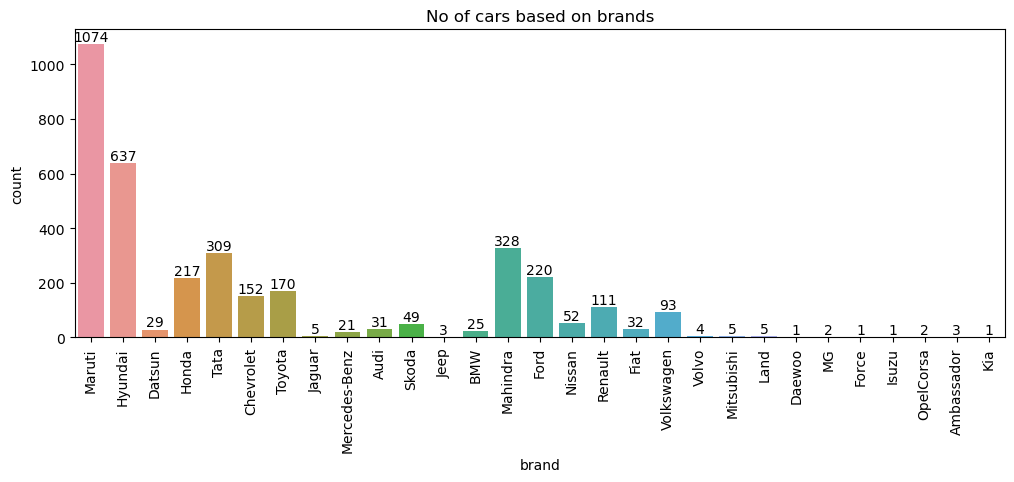

In [38]:
plt.figure(figsize=(12,4))
a=sns.countplot(data=df,x='brand')
a.bar_label(a.containers[0])
plt.title("No of cars based on brands")
plt.xticks(rotation=90)
plt.show()

Plot a graph owner vs age of cars

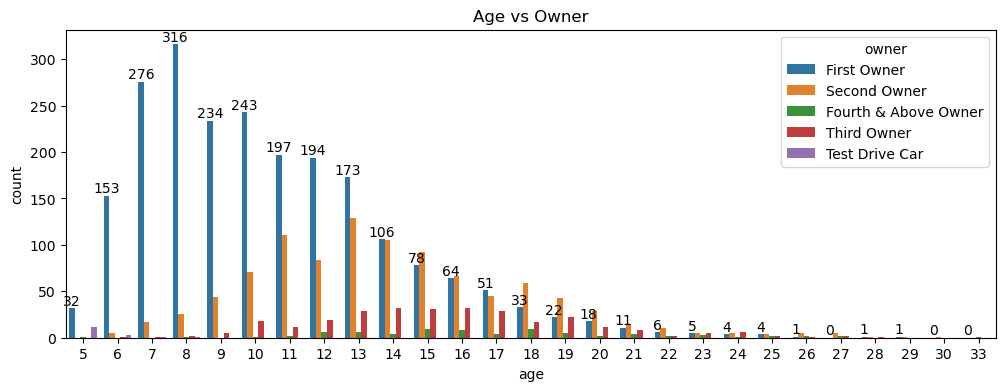

In [39]:
plt.figure(figsize=(12,4))
plt.title("Age vs Owner")
a=sns.countplot(data=df,x='age',hue='owner')


a.bar_label(a.containers[0])
plt.show()

OBSERVATION

        the age of car between 5 to 15 more persons are used to buy it, if it become second handle, but after 15 years old of car, will be less chance to buy

which type of fuel cars are survived most

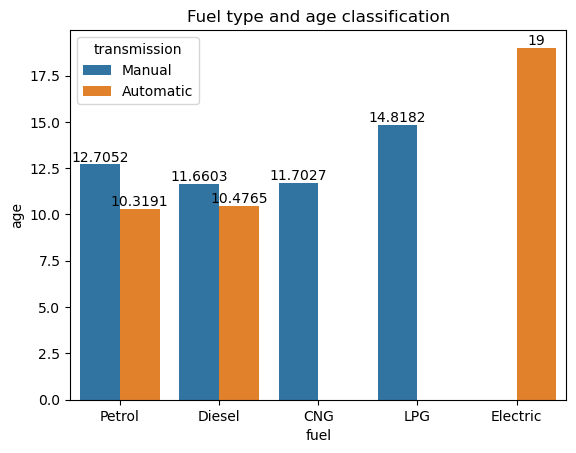

In [40]:
o=sns.barplot(data=df,y='age',x='fuel',hue='transmission',errorbar=None)
for i in o.containers:
    o.bar_label(i)
    plt.title('Fuel type and age classification')

OBSERVATION

    Diesel cars are give more life to cars (29 highest survived)  but they are more in number, petrol cars also used most (33 highest survived) used fuel , they are less in number 

In [41]:
# cond=(df['fuel']=='Diesel')  & (df['transmission']=='Automatic')
# # cond1=
# df.loc[cond,['year']]

In [42]:
# cond=(df['fuel']=='Diesel')  & (df['transmission']=='Manual')
# # cond1=
# df.loc[cond,['year']]

In [43]:
# cond=(df['fuel']=='Petrol')  & (df['transmission']=='Manual')
# # cond1=
# df.loc[cond,['year']]

In [44]:
# cond=(df['fuel']=='Petrol')  & (df['transmission']=='Automatic')
# # cond1=
# df.loc[cond,['year']]

In [45]:
# cond=(df['fuel']=='Diesel')
# df.loc[cond,['year']].min()

Get the pattern selling price vs transmisiion

<Figure size 1200x600 with 0 Axes>

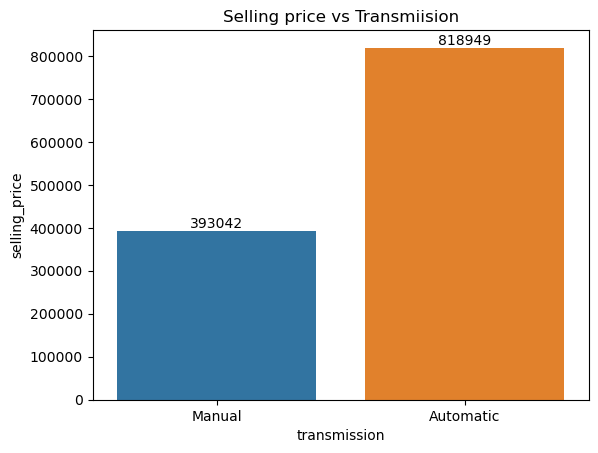

<Figure size 1200x600 with 0 Axes>

In [46]:
plt.title("Selling price vs Transmiision")
a=sns.barplot(data=df,y='selling_price',x='transmission',errorbar=None)
a.bar_label(a.containers[0])
plt.figure(figsize=(12,6))



OBSERVATION

    As per analysis, manual gear cars more which is less costly, but automatic gear cars are less but there cost is more to buy, and there is variation or otliers in automatic gear

What is the distribution of cars across different age categories?

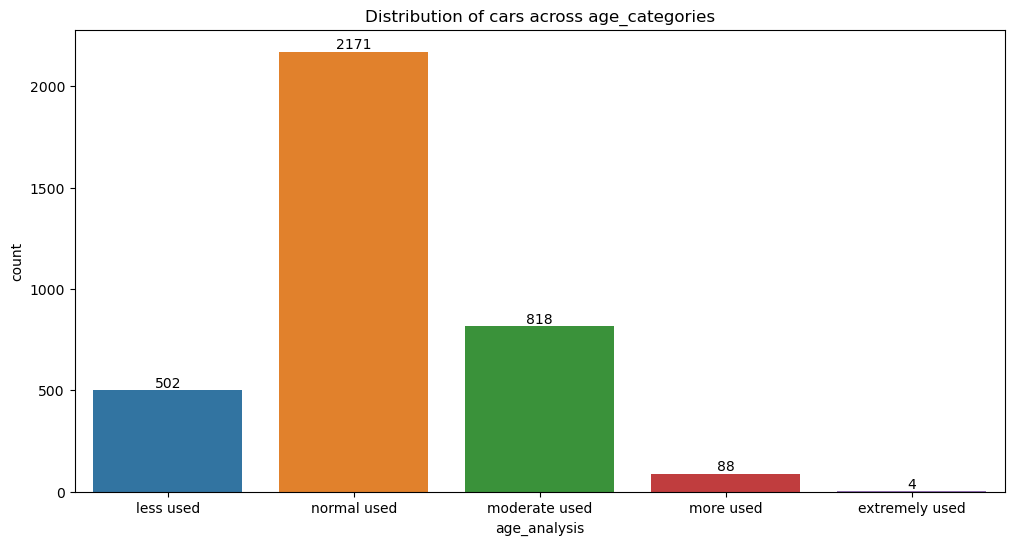

In [47]:
plt.figure(figsize=(12,6))
a=sns.countplot(data=df,x='age_analysis')
a.bar_label(a.containers[0])
plt.title("Distribution of cars across age_categories")
plt.show()

OBSERVATION

        The normal used cars give average life flie and more to a branded cars

Is there a shift in popularity for fuel types over the years?

C:\Users\DELL\AppData\Local\Temp\ipykernel_22644\2843494664.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  a=sns.kdeplot(data=df,x='year',hue='fuel',fill=True)


<Figure size 1200x600 with 0 Axes>

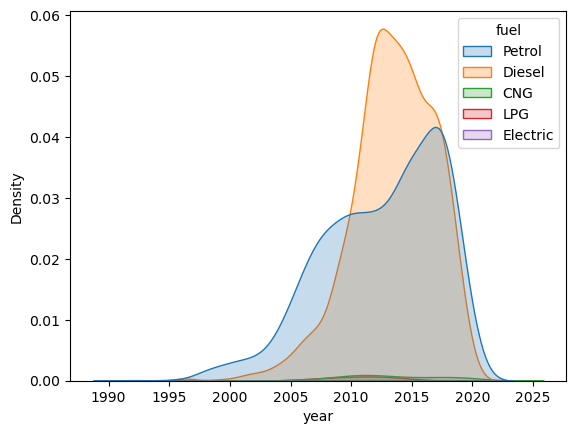

<Figure size 1200x600 with 0 Axes>

In [48]:
a=sns.kdeplot(data=df,x='year',hue='fuel',fill=True)
a
plt.figure(figsize=(12,6))
# use face grid algorithm

OBSERVATION

     Yes, the year 1995 to 2020 more petrol cars especially in the era of 2005 to 2020 are more

     diesel are also similar to petrol, where 2010 to 2015 are more in number

Plot a graph over a year vs brand 

Text(0.5, 1.0, 'Year vs Brand')

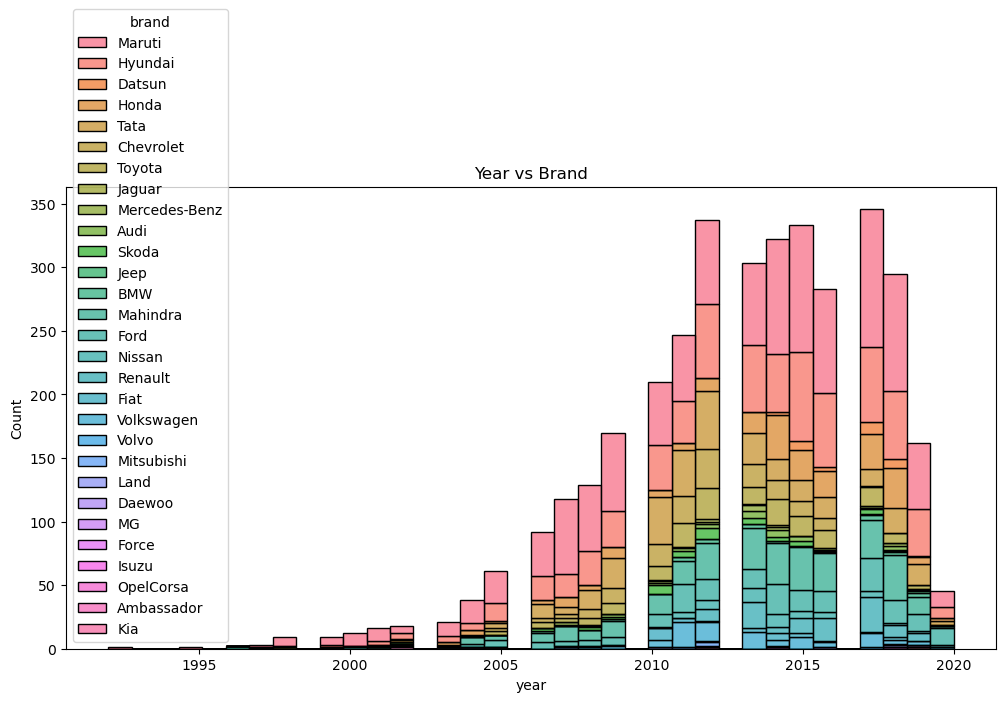

In [49]:
plt.figure(figsize=(12,6))
a=sns.histplot(data=df,x='year',hue='brand',multiple='stack')
# for i in a.containers:
#     a.bar_label(i)
plt.title("Year vs Brand")


OBSERVATION

        in the above plot, maruti, hyndai are more in market in every periods

Percentage of cars in seller type

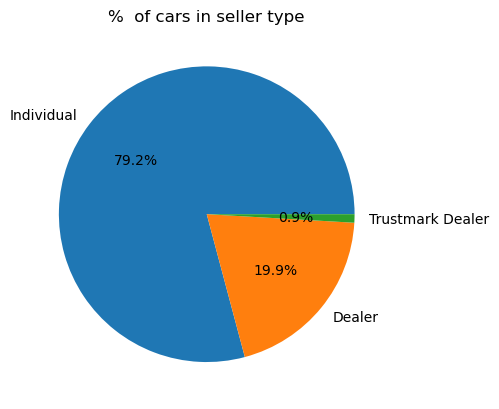

In [50]:
per_house=df['seller_type'].value_counts()
plt.title("%  of cars in seller type")
plt.pie(x=per_house.values,labels=per_house.index,autopct='%1.1f%%')
plt.show()

OBSERVATION

    Individual dealers are more than dealer, dealer are more than trustmark dealer, as well as, individual, dealer, and trustmark dealers are more in maruti, hyndai, 

In [51]:
# cond=(df['seller_type']=='Trustmark ')
# df.loc[cond,['brand']].value_counts()


In [52]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,age_analysis,price_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used,3333.333333
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used,7500.000000
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,normal used,46153.846154
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,normal used,31250.000000
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,normal used,40909.090909


PLot a graph distribution of age and seller type

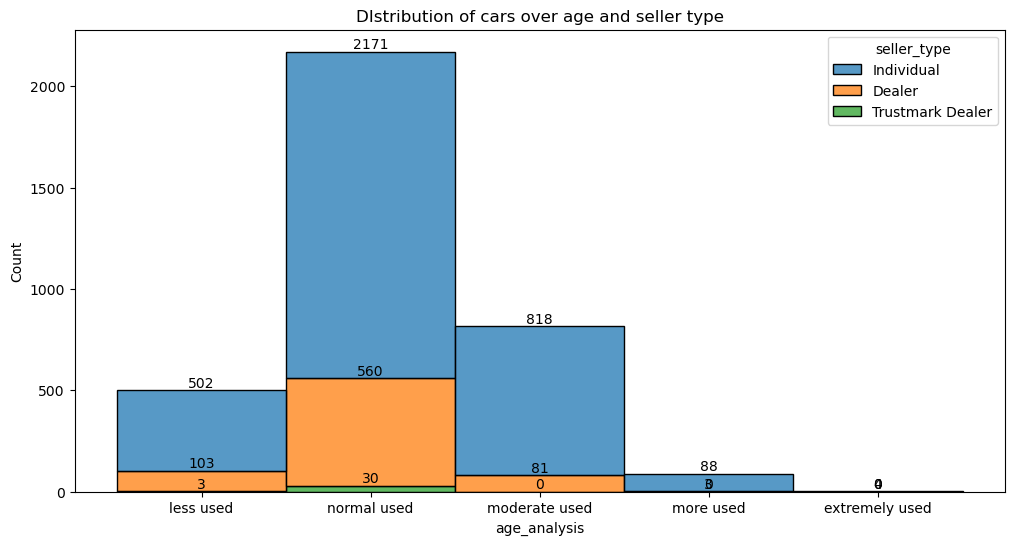

In [53]:
plt.figure(figsize=(12,6))
plt.title("DIstribution of cars over age and seller type")
a=sns.histplot(data=df,x='age_analysis',hue='seller_type',multiple='stack')
for i in a.containers:
    a.bar_label(i)



 Get the plot, relationship between selling price and brand

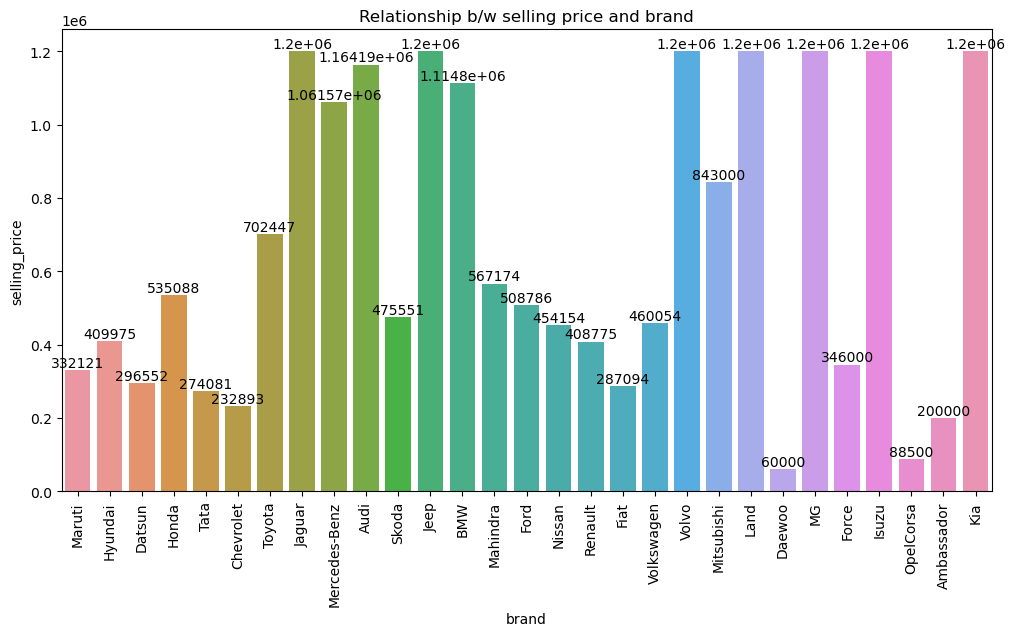

In [54]:
plt.figure(figsize=(12,6))
plt.title("Relationship b/w selling price and brand")
a=sns.barplot(data=df,y='selling_price',x='brand', errorbar=None)
plt.xticks(rotation = 90)
for i in a.containers:
    a.bar_label(i)

In the plot, maruti, hyundai , datsun , tata have no outliers, and price of car also good to buy, where toyota, mahindra, are having outliers , we can see, where price of cars are vary, and kia,isuzu, forrce,mg, land,audi,jaguar etc are consists big variation in price, which consists very far outliers

7. Draw a plot, which gear is more runned with fuel type

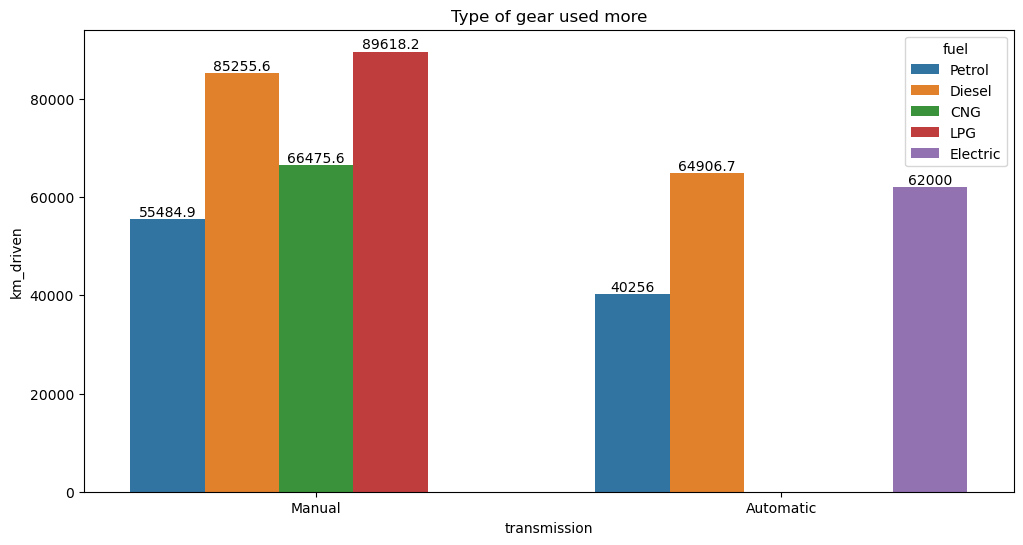

In [55]:
plt.figure(figsize=(12,6))
plt.title("Type of gear used more")

a=sns.barplot(data=df,y='km_driven',x='transmission',hue='fuel',errorbar=None)
for i in a.containers:
    a.bar_label(i)

OBSERVATION

    IN automatic gear type, there is no CNG, LPG fuel type
    Diesel cars more kilo meter run than petrol cars

Is there any outliers in selling price of cars

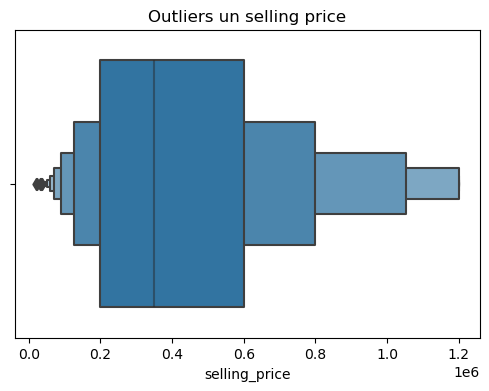

In [56]:
plt.figure(figsize=(6,4))
plt.title("Outliers un selling price")
a=sns.boxenplot(data=df,x='selling_price')
# a.bar_label(a.containers[0])

OBSERVATION

    using boxplot, we can see that there is outliers in selling price, that is , in the above scatter plot, kia, jaguar, mahindra, isuzu etc cars having lot of variations in price, they are not increasing in slightly

 Correlation between year,km driven and selling price

<Axes: >

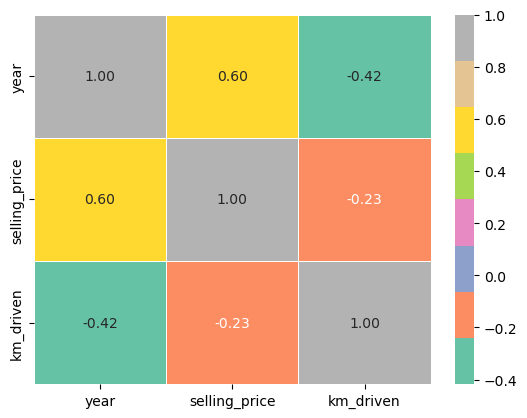

In [57]:
a=df.loc[::,['year','selling_price','km_driven']].corr()
sns.heatmap(a,cmap='Set2',annot=True,linewidths=0.5,fmt='0.2f')

OBSERVATION 

        selling price is more then the car is new ,i.e., age of car is less
        year or age of car is more, then the kilo driven is more, where the price of car is less
        

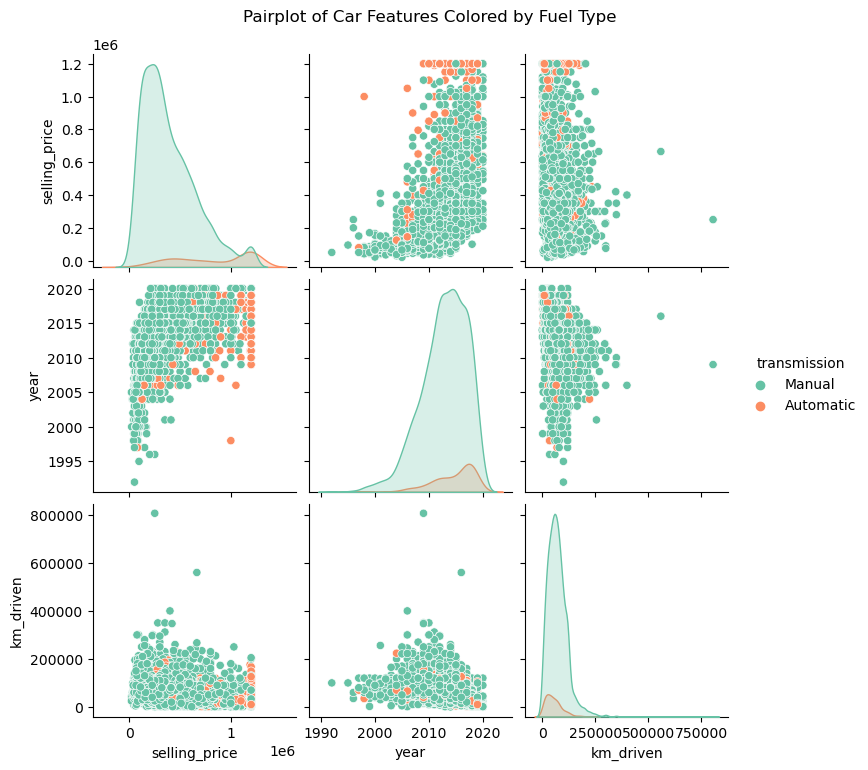

In [ ]:
df_pair = df[['selling_price', 'year', 'km_driven', 'transmission','brand']]

sns.pairplot(data=df_pair, hue='transmission', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Car Features Colored by Fuel Type', y=1.02)
plt.show()


OBSERVATION

    Selling price -manual gear are more than automatic and there is outliers in automatic gear types
    Year- automatic cars came existence in 2010 to 2020  and similarly manual cars are decreasing , and automatic transmission cars more costly than manual cars
    km driven -there is an outliers in both automatic and manual type
    

CONCLUSION

Top 5 branded cars are Maruti, Hyundai, Honda, Mahindra, Toyota are  give good life span of cars with automatic and manual gear types, in the era of 2010 to 2020 more automatic cars with diseal fuel are comeing market, most of cutomers are interested to buy individual with first handle,and this brand cars can give good mileage

In [59]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,age_analysis,price_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used,3333.333333
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,moderate used,7500.000000
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,normal used,46153.846154
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,normal used,31250.000000
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,normal used,40909.090909


In [60]:
cond=(df['brand']=='Jaguar') | (df['brand']=='Kia') | (df['brand']=='Land')
df.loc[cond,['age','selling_price','fuel','km_driven','transmission','brand']].value_counts()


age  selling_price  fuel    km_driven  transmission  brand 
6    1200000        Diesel  10000      Automatic     Kia       1
7    1200000        Diesel  68000      Automatic     Land      1
                    Petrol  68000      Automatic     Land      1
9    1200000        Diesel  53000      Automatic     Land      1
11   1200000        Diesel  28000      Automatic     Jaguar    1
12   1200000        Diesel  64000      Automatic     Jaguar    1
13   1200000        Diesel  50000      Automatic     Jaguar    1
                            149000     Automatic     Land      1
                    Petrol  66363      Automatic     Jaguar    1
15   1200000        Diesel  100000     Automatic     Land      1
                    Petrol  40000      Automatic     Jaguar    1
dtype: int64

CONCLUSION

why remaining brands car not choosen by customers?

1. the brands like kia, isuzu, Land, Volvo , BMW, Jaguar etc brands are more costly , where middle class people not offer that much
2. The above brand cars give less life span of cars
3. They give less mileage i.e., they drive less KM compare to top brands
4. There is no trusted dealers in these brands , it affect to buy a car
5. In this cars , there is no manual gear type cars, some people may prefer manual cars also